In [1]:
# using Distributed
using Distributions
using PyPlot

# addprocs(12)

# @everywhere begin
using QuantumCircuits
using QuantumOptics
using Statistics
using Random
using LinearAlgebra
# end

In [2]:
# @everywhere begin
    # Basis
    q = SpinBasis(1//2)

    # Operators
    σx = sigmax(q)
    σy = sigmay(q)
    σz = sigmaz(q)
    id = identityoperator(q)

    # Initial condition
    ρ0 = dm(spindown(q))

    # Parameters
    Ω  = 2π # Rabi frequency
    τ = 3.0 # Measurement collapse timescale
    Γ = 1/(2τ) # Measurement dephasing rate
    T = (0.0, 6τ) # Time duration of simulation
    η = 0.3
    
    H(t) = 2exp(-(t-3τ)^2/2)/√(2π)*(Ω/2)*σy
    J = [√(Γ)σz]
    C = [√(Γ*η)σz]
    
    H0 = Ω*σy/2

    expects = ρ -> collect(real(expect(ρ, s)) for s in [σx,σy,σz]) # ρ -> [<x>,<y>,<z>]
# end

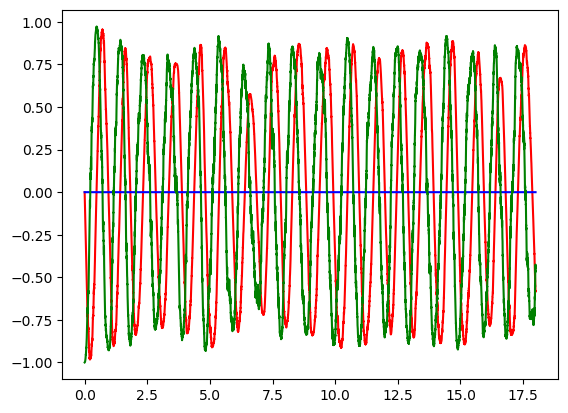

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1593cba90>

In [16]:
Random.seed!(1)
dt = 1e-3
tstep = [range(T[1], T[2], step=dt);]
tt, ρs = stochastic.master(tstep, ρ0, H0, J, C; dt=dt); # having trouble getting master_dynamic to work for H(t) comparison
evs = expects.(ρs)
evs = [evs[n][ax] for n in 1:length(tt), ax in 1:3]
plt.plot(tt, evs[:,1], "r")
plt.plot(tt, evs[:,2], "b")
plt.plot(tt, evs[:,3], "g")

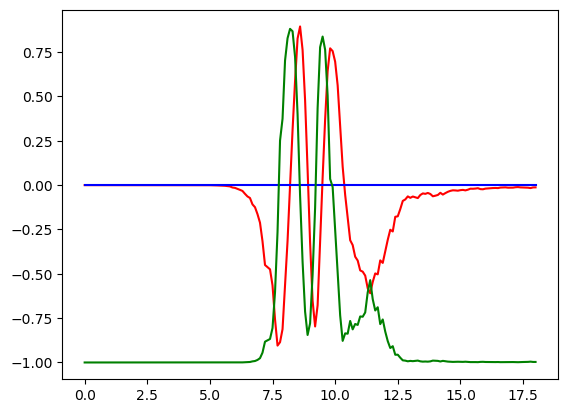

  0.135507 seconds (153.86 k allocations: 8.154 MiB)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x159a7b950>

In [17]:
Random.seed!(1)
dt0 = 1e-1
tt0, ρs0, dy = @time rouchon(T, ρ0, H, J, C; dt=dt0);
evs0 = expects.(ρs0)
evs0 = [evs0[n][ax] for n in 1:length(tt0), ax in 1:3]
plt.plot(tt0, evs0[:,1], "r")
plt.plot(tt0, evs0[:,2], "b")
plt.plot(tt0, evs0[:,3], "g")

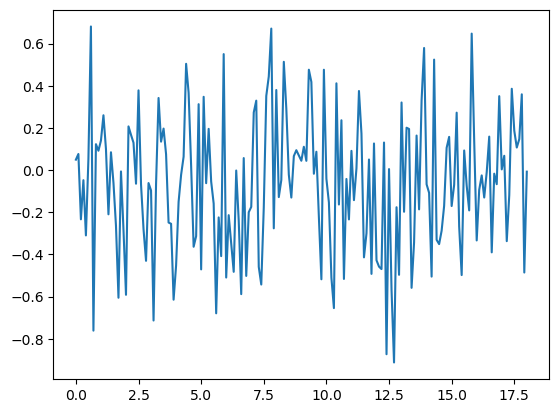

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15832fd50>

In [18]:
plt.plot(tt0, dy[1])

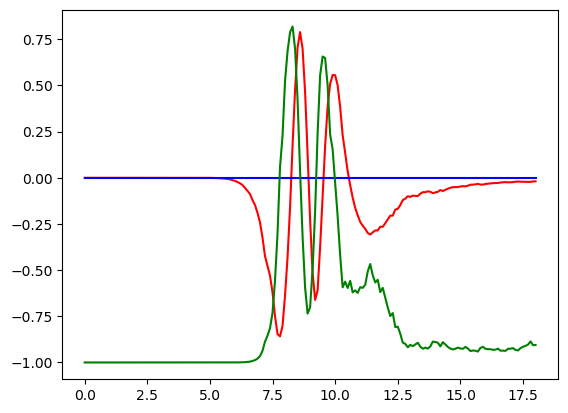

  5.762531 seconds (10.56 M allocations: 574.801 MiB, 4.55% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x159b9c910>

In [19]:
Random.seed!(1)
dt1 = dt0
tt1, ρs1, dy1 = @time bayesian(T, ρ0, H, J, C; dt=dt1);
evs1 = expects.(ρs1)
evs1 = [evs1[n][ax] for n in 1:length(tt1), ax in 1:3]
plt.plot(tt1, evs1[:,1], "r")
plt.plot(tt1, evs1[:,2], "b")
plt.plot(tt1, evs1[:,3], "g")

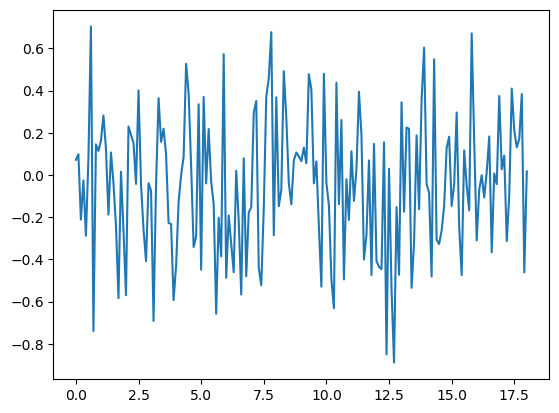

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x159af8510>

In [20]:
plt.plot(tt1, [dy[1]*dt1 for dy in dy1])